In [1]:
import numpy as np
import networkx as nx
import tsplib95
import matplotlib.pyplot as plt
import math
import functions as f
from tsp import experiment
from tqdm import tqdm
import tsp_pso 

In [6]:
filename = "bier127.tsp"
problem = tsplib95.load(filename)
G  = problem.get_graph()
arr=np.array(G.nodes)
np.random.shuffle(arr)
# solution = tsplib95.load("ch130.opt.tour")
# solution = solution.as_dict()['tours'][0]

In [10]:
edges = {}

for i in range(1,len(G.nodes)+1):
    for j in range(i,len(G.nodes)+1):
        edges[(i,j)] = edges[(j,i)] = G.edges[(i,j)]['weight']

graph = tsp_pso.Graph(len(G.nodes),G.nodes, edges)

pso = tsp_pso.PSO(graph,100000,5)
pso.run()
pso.getGBest().getCostPBest()
print('gbest: %s | cost: %d\n' % (pso.getGBest().getPBest(), pso.getGBest().getCostPBest()))

# alphas = [0.1,0.2,0.5,0.7,0.9,1]
# betas = [0.1,0.2,0.5,0.7,0.9,1]
# res_a=[]
# res_b=[]

# for alpha in alphas:
#     print("\nAlpha:", alpha)
#     pso = tsp_pso.PSO(graph,1000,20, alfa=alpha)
#     pso.run()
#     res_a.append(pso.getGBest().getCostPBest())
#     # print('gbest: %s | cost: %d\n' % (pso.getGBest().getPBest(), res_a[-1]))

# for beta in betas:
#     print("\nBeta:", beta)
#     pso = tsp_pso.PSO(graph,1000,20, beta=beta)
#     pso.run()
#     res_b.append(pso.getGBest().getCostPBest())
#     # print('gbest: %s | cost: %d\n' % (pso.getGBest().getPBest(), res_b[-1]))

# plt.plot(alphas,res_a, label="alphas")
# plt.plot(betas,res_b, label="betas")
# plt.legend()


gbest: [33, 92, 60, 1, 64, 3, 118, 61, 94, 50, 117, 109, 37, 67, 17, 16, 24, 91, 42, 11, 15, 13, 63, 126, 20, 4, 7, 76, 58, 52, 106, 38, 51, 18, 104, 45, 49, 124, 114, 115, 116, 98, 53, 93, 95, 89, 21, 101, 102, 59, 97, 31, 5, 6, 68, 65, 44, 119, 43, 28, 40, 73, 86, 70, 10, 125, 46, 103, 122, 71, 81, 2, 57, 55, 23, 110, 30, 113, 36, 72, 90, 56, 108, 27, 34, 39, 84, 77, 123, 78, 99, 48, 121, 35, 29, 26, 54, 80, 79, 9, 12, 62, 83, 87, 69, 85, 66, 105, 47, 14, 22, 25, 100, 96, 74, 75, 107, 41, 32, 120, 8, 88, 19, 82, 112, 111, 127] | cost: 566843



In [44]:
solution = tsplib95.load("ch130.opt.tour")
solution = solution.as_dict()['tours'][0]

Closest neighbour path, Fitness: 148354.76707314875


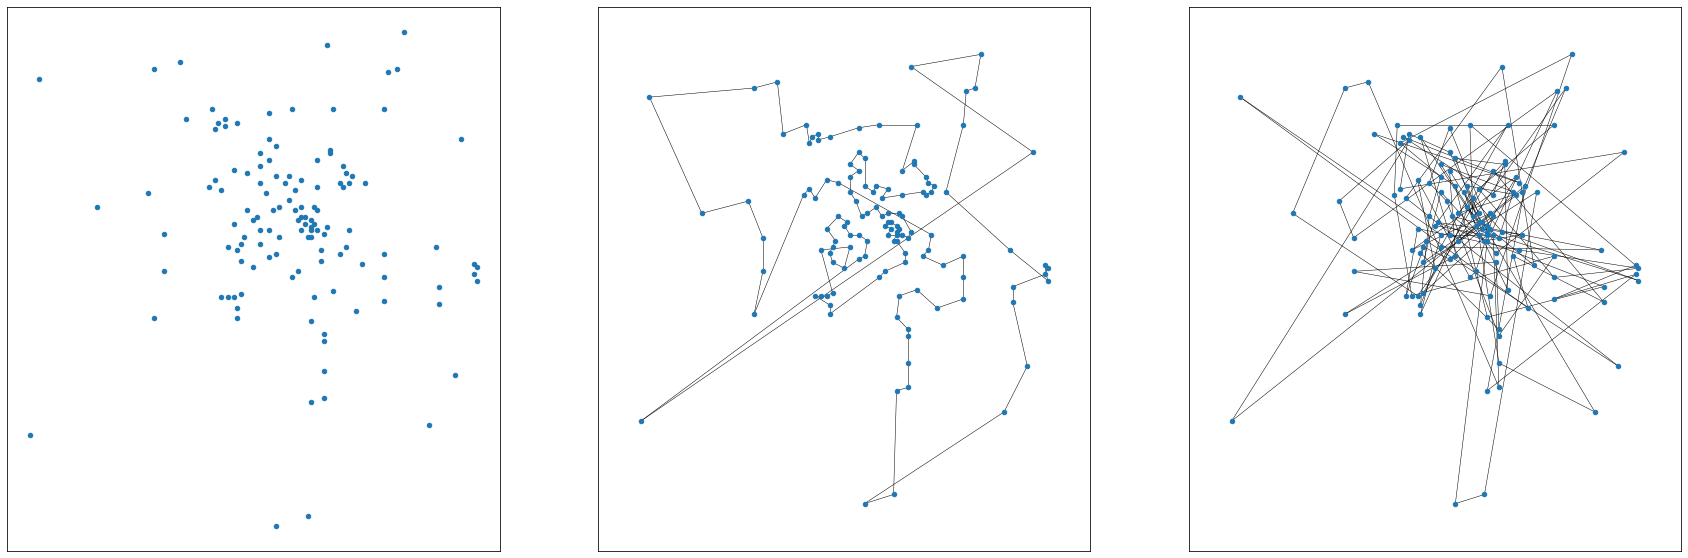

In [11]:

solution = f.get_edge_list(solution)
dictionary = f.node_positions(G)
fig, axs = plt.subplots(1,3, figsize=(30,10))
nx.draw_networkx_nodes(G, pos=dictionary, node_size=20, ax=axs[0])
# print(f"Optimal path, Fitness: " , f.get_fitness(G,solution))
# nx.draw_networkx(G, pos=dictionary, with_labels=False, node_size=20, edgelist=[], ax=axs[1], label=fit)
# nx.draw_networkx_edges(G, pos=dictionary, width=0.5,edgelist=solution, ax=axs[1], label=fit)



path = f.closest_neighbor_alg(G)
fit = str(f.get_fitness(G,f.get_edge_list(path)))
print(f"Closest neighbour path, Fitness: " + fit)
nx.draw_networkx(G, pos=dictionary, with_labels=False, node_size=20, edgelist=[], ax=axs[1], label=fit)
nx.draw_networkx_edges(G, pos=dictionary, width=0.5,edgelist=f.get_edge_list(path), ax=axs[1], label=fit)

nx.draw_networkx(G, pos=dictionary, with_labels=False, node_size=20, edgelist=[], ax=axs[2], label=fit)
nx.draw_networkx_edges(G, pos=dictionary, width=0.5,edgelist=f.get_edge_list(pso.getGBest().getPBest()), ax=axs[2], label=fit)
plt.show()# solution = tsplib95.load("ch130.opt.tour").tours[0]

In [6]:
# %%time
# for iterations in [10, 20, 50, 100 ,1000]: 
#     experiment(filename="ch130.tsp", iterations=iterations, interval=iterations/5, pop_size=1000)
iterations=10000
experiment(filename="ch130.tsp", iterations=iterations, interval=iterations/5, pop_size=20)

TSP problem used:   ch130.tsp
Num. iterations:    10000
Interval:           2000.0
Population size:    20
Mutation rate:      0.1
Show outputs:       True
Iteration 0 ; Best fitness: 41969.01356744426
Iteration 2000 ; Best fitness: 14030.474647886625
Iteration 4000 ; Best fitness: 13943.08217055564
Iteration 6000 ; Best fitness: 13714.178299158219
Iteration 8000 ; Best fitness: 11592.722842758456
Best fitness: 11286.28303039538
